In [1]:
import numpy as np
import matplotlib.pyplot as plt

Quadrature Grid Points:
[[0.11270167 0.06943184 0.04691008]
 [0.11270167 0.06943184 0.23076534]
 [0.11270167 0.06943184 0.5       ]
 [0.11270167 0.06943184 0.76923466]
 [0.11270167 0.06943184 0.95308992]
 [0.11270167 0.33000948 0.04691008]
 [0.11270167 0.33000948 0.23076534]
 [0.11270167 0.33000948 0.5       ]
 [0.11270167 0.33000948 0.76923466]
 [0.11270167 0.33000948 0.95308992]
 [0.11270167 0.66999052 0.04691008]
 [0.11270167 0.66999052 0.23076534]
 [0.11270167 0.66999052 0.5       ]
 [0.11270167 0.66999052 0.76923466]
 [0.11270167 0.66999052 0.95308992]
 [0.11270167 0.93056816 0.04691008]
 [0.11270167 0.93056816 0.23076534]
 [0.11270167 0.93056816 0.5       ]
 [0.11270167 0.93056816 0.76923466]
 [0.11270167 0.93056816 0.95308992]
 [0.5        0.06943184 0.04691008]
 [0.5        0.06943184 0.23076534]
 [0.5        0.06943184 0.5       ]
 [0.5        0.06943184 0.76923466]
 [0.5        0.06943184 0.95308992]
 [0.5        0.33000948 0.04691008]
 [0.5        0.33000948 0.23076534]
 [0.

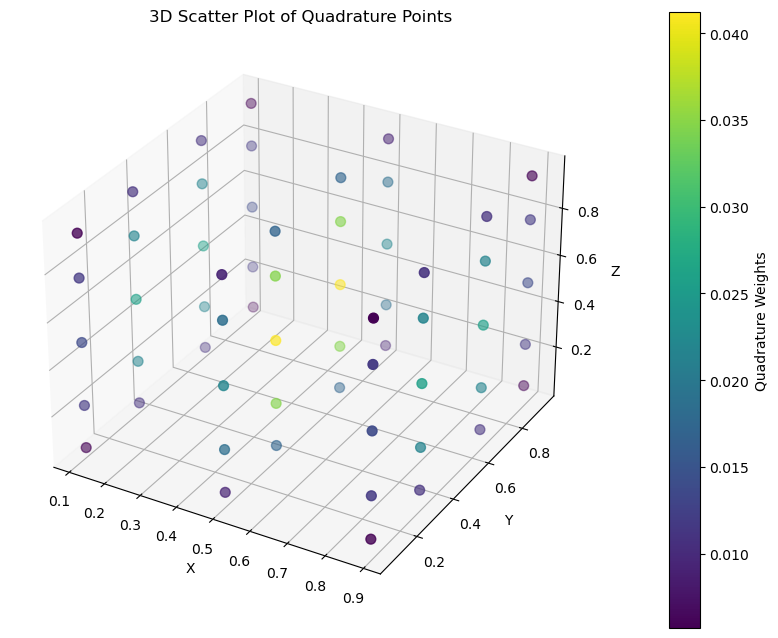

In [6]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gauss_legendre_quadrature_grid(points_per_dim):
    """
    Construct a Gauss-Legendre quadrature grid in an n-dimensional unit hypercube.

    Parameters:
        points_per_dim (list of int): List specifying the number of quadrature points for each dimension.

    Returns:
        grid_points (numpy.ndarray): The quadrature points in the n-dimensional space.
        weights (numpy.ndarray): The corresponding weights for each point in the grid.
    """
    n_dim = len(points_per_dim)

    # Get Gauss-Legendre quadrature points and weights for each dimension
    quadrature_data = [np.polynomial.legendre.leggauss(n_points) for n_points in points_per_dim]

    # Rescale points and adjust weights for each dimension
    rescaled_points = [0.5 * (x + 1) for x, _ in quadrature_data]
    rescaled_weights = [0.5 * w for _, w in quadrature_data]

    # Generate the Cartesian product of points and weights for all dimensions
    grid_points = np.array(list(product(*rescaled_points)))
    weights = np.array([np.prod(w_comb) for w_comb in product(*rescaled_weights)])

    return grid_points, weights

def plot_3d_scatter(grid_points, weights):
    """
    Plot a 3D scatter plot of quadrature points, colored by their weights.

    Parameters:
        grid_points (numpy.ndarray): Quadrature points (N x 3 array).
        weights (numpy.ndarray): Quadrature weights (N array).
    """
    if grid_points.shape[1] != 3:
        raise ValueError("3D scatter plot requires 3-dimensional points.")

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot with weights determining the color
    sc = ax.scatter(grid_points[:, 0], grid_points[:, 1], grid_points[:, 2], 
                    c=weights, cmap='viridis', s=50)
    
    # Add colorbar and labels
    cbar = plt.colorbar(sc, ax=ax, pad=0.1)
    cbar.set_label('Quadrature Weights')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Scatter Plot of Quadrature Points')

    plt.show()

# Example usage
if __name__ == "__main__":
    points_per_dim = [3, 4, 5]  # Number of quadrature points for each dimension

    grid_points, weights = gauss_legendre_quadrature_grid(points_per_dim)

    print("Quadrature Grid Points:")
    print(grid_points)
    print("\nQuadrature Weights:")
    print(weights)
    print(np.sum(weights))
    # Plot the 3D scatter of the quadrature points colored by weights (only works for 3D)
    if len(points_per_dim) == 3:
        plot_3d_scatter(grid_points, weights)


In [ ]:
class GaussLegendreQuadrature2D:
    def __init__(self, Q, n_elements):
        self.Q = Q
        self.n_elements = np.array(n_elements)
        self.d = len(Q)
        self.L_elements = 1/np.array(n_elements)
        self.w, self.xi = self.compute_interiorquadrature()
        # self.compute_boundaryquadrature()
        
    def compute_interiorquadrature(self):
        # Get Gauss-Legendre quadrature points and weights for each dimension
        quadrature_data = [np.polynomial.legendre.leggauss(n_points) for n_points in self.Q]
        # Rescale points and adjust weights for each dimension
        rescaled_points = [0.5 * (x + 1) for x, _ in quadrature_data]
        rescaled_points = [rescaled_points[dim]*self.L_elements[dim] for dim in range(self.d)]
        rescaled_weights = [0.5 * w for _, w in quadrature_data]
        rescaled_weights = [rescaled_weights[dim]*self.L_elements[dim] for dim in range(self.d)]
        allpoints = rescaled_points
        allweights = rescaled_weights
        for dim in range(self.d):
            print('dim:')
            print(dim)
            for i in range(1,self.n_elements[dim]):
                print(i)
                newpoints = rescaled_points[dim] + self.L_elements[dim]*i
                allpoints[dim] = np.append(allpoints[dim], newpoints)
                allweights[dim] = np.append(allweights[dim], rescaled_weights[dim])
        xis = np.array(list(product(*allpoints)))
        ws = np.array([np.prod(w_comb) for w_comb in product(*allweights)])
        ws = np.array(ws).flatten()
        xis = np.array(xis)
        return ws, xis

    def plot_2dquadraturegrid(self):
        fig, ax = plt.subplots(1,1, figsize=(6, 4))
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
        ax.scatter(self.xi[:,0], self.xi[:,1], c=self.w, s=1)
        ax.tick_params(axis='both', labelsize=size_ticklabels)
        plt.axis('square')
        plt.colorbar()
        # plt.savefig("GL_Q"+str(self.Q)+".svg", bbox_inches='tight')#, transparent=True)

In [84]:
quad = GaussLegendreQuadrature2D(Q=[10,10,10], n_elements=[2,2,2])

dim:
0
1
dim:
1
1
dim:
2
1


In [ ]:
quad.pl

(8000, 3)

In [72]:
np.sum(quad.w)

0.9999999999999998

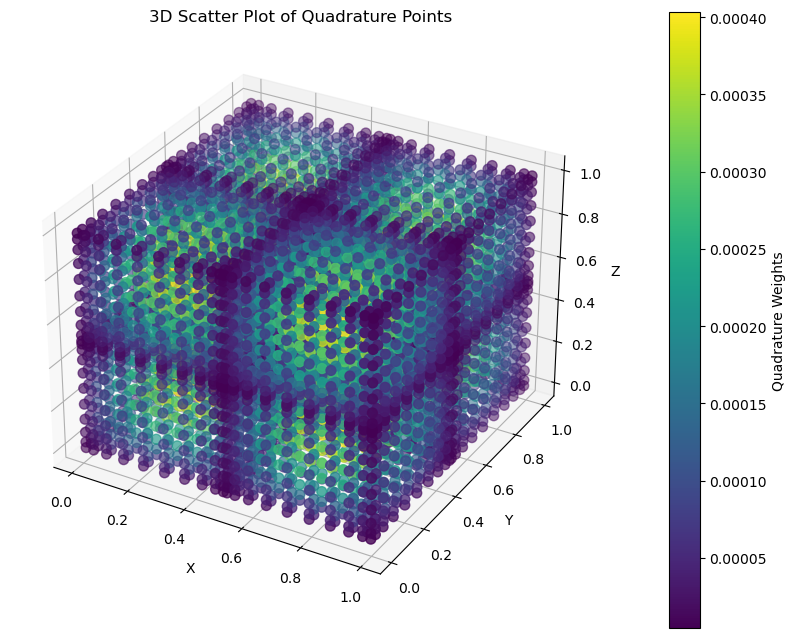

In [73]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with weights determining the color
sc = ax.scatter(quad.xi[:, 0], quad.xi[:, 1], quad.xi[:, 2], 
            c=quad.w, cmap='viridis', s=50)

# Add colorbar and labels
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Quadrature Weights')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Quadrature Points')

plt.savefig("ndquadrature.svg", bbox_inches='tight')#, transparent=True)

plt.show()

In [15]:
import numpy as np
from itertools import product

class GaussLegendreQuadrature:
    def __init__(self, Q, n_elements):
        self.Q = np.array(Q)
        self.n_elements = np.array(n_elements)
        self.Q_per_element = np.array(self.Q/self.n_elements, dtype=int)
        self.d = len(Q)
        self.L_elements = 1 / np.array(n_elements)
        self.w, self.xi = self.compute_quadrature()

    def compute_quadrature(self):
        # Get Gauss-Legendre quadrature points and weights for each dimension
        quadrature_data = [np.polynomial.legendre.leggauss(n_points) for n_points in self.Q_per_element]
        # Rescale points and adjust weights for each dimension
        rescaled_points = [0.5 * (x + 1) for x, _ in quadrature_data]
        rescaled_points = [rescaled_points[dim] * self.L_elements[dim] for dim in range(self.d)]
        rescaled_weights = [0.5 * w for _, w in quadrature_data]
        rescaled_weights = [rescaled_weights[dim] * self.L_elements[dim] for dim in range(self.d)]
        allpoints = rescaled_points[:]
        allweights = rescaled_weights[:]
        for dim in range(self.d):
            for i in range(1, self.n_elements[dim]):
                newpoints = rescaled_points[dim] + self.L_elements[dim] * i
                allpoints[dim] = np.append(allpoints[dim], newpoints)
                allweights[dim] = np.append(allweights[dim], rescaled_weights[dim])
        xis = np.array(list(product(*allpoints)))
        ws = np.array([np.prod(w_comb) for w_comb in product(*allweights)])
        return ws.flatten(), xis
    
    def plot_2dquadraturegrid(self):
        fig, ax = plt.subplots(1,1, figsize=(6, 4))
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
        sc = ax.scatter(self.xi[:,0], self.xi[:,1], c=self.w, s=50)
        plt.axis('square')
        cbar = plt.colorbar(sc, ax=ax, pad=0.1)
        # plt.savefig("GL_Q"+str(self.Q)+".svg", bbox_inches='tight')#, transparent=True)
    
    def plot_3dquadraturegrid(self):
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        # Scatter plot with weights determining the color
        sc = ax.scatter(quad.xi[:, 0], self.xi[:, 1], self.xi[:, 2], c=quad.w, cmap='viridis', s=50)
        # Add colorbar and labels
        cbar = plt.colorbar(sc, ax=ax, pad=0.1)
        cbar.set_label('Quadrature Weights')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('3D Scatter Plot of Quadrature Points')
        # plt.savefig("ndquadrature.svg", bbox_inches='tight')#, transparent=True)
        plt.show()


In [27]:
quad = GaussLegendreQuadrature(Q=np.array([20, 20, 30]), n_elements=np.array([2, 2, 3]))
print(f"Number of points: {len(quad.xi)}")
print(f"Shape of xi: {quad.xi.shape}")
print(f"Shape of w: {quad.w.shape}")


Number of points: 12000
Shape of xi: (12000, 3)
Shape of w: (12000,)


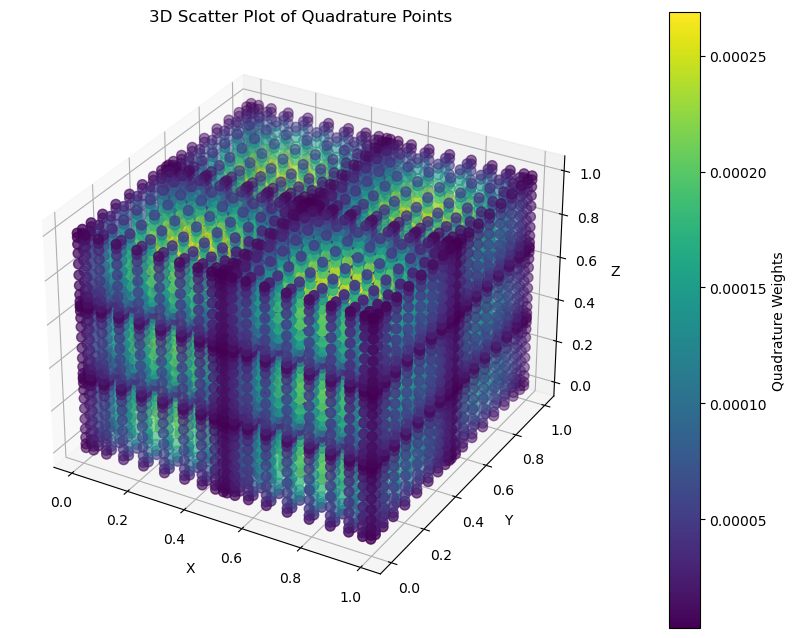

In [28]:
quad.plot_3dquadraturegrid()

In [26]:
x = np.random.uniform(size=(100,2))
y = x

In [15]:
x.shape

(100, 2)

In [19]:
z = np.append(x,y, axis=0)

In [20]:
z

array([[0.18996312, 0.88236933],
       [0.40097341, 0.75609843],
       [0.33003954, 0.37455694],
       [0.34781229, 0.22822632],
       [0.81337687, 0.56979124],
       [0.44955771, 0.38757233],
       [0.84500408, 0.10277758],
       [0.11157906, 0.22398801],
       [0.61412732, 0.02849861],
       [0.82441666, 0.99852955],
       [0.35666259, 0.11590367],
       [0.79804408, 0.9040001 ],
       [0.80493552, 0.60346714],
       [0.3783091 , 0.19727861],
       [0.92906615, 0.20174791],
       [0.92321153, 0.6884058 ],
       [0.89917272, 0.69508721],
       [0.60587462, 0.57984361],
       [0.6511253 , 0.40592753],
       [0.02293868, 0.28847512],
       [0.63710796, 0.26926059],
       [0.1013068 , 0.39947501],
       [0.43504047, 0.47641987],
       [0.31212168, 0.99193392],
       [0.05305515, 0.40831145],
       [0.21526169, 0.18592818],
       [0.88583223, 0.36767819],
       [0.35825746, 0.74595675],
       [0.38290018, 0.93115504],
       [0.30822943, 0.45965448],
       [0.